In [164]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np

### Loading Data

In [165]:
feedback_df = pd.read_csv('../abschluss-daten/feedback.csv')
device_df = pd.read_csv('../abschluss-daten/feedback.csv')
participant_df = pd.read_csv('../abschluss-daten/participant.csv')

In [166]:
def parse_timestamp(timestamp):
    date_str = timestamp.split('T')[0]
    time_str = timestamp.split('T')[1]

    return datetime.datetime.fromisoformat(date_str + ' ' + time_str[:5])

In [167]:
for column_name in feedback_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        feedback_df[column_name] = feedback_df[column_name].dropna().apply(parse_timestamp)

for column_name in device_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        device_df[column_name] = device_df[column_name].dropna().apply(parse_timestamp)

for column_name in participant_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        participant_df[column_name] = participant_df[column_name].dropna().apply(parse_timestamp)


In [168]:
daily_airDraft_df = feedback_df[['daily_airDraft_timestamp','daily_airDraft_value']].dropna()
daily_ambientSounds_df = feedback_df[['daily_ambientSounds_timestamp','daily_ambientSounds_value']].dropna()
daily_artificialLight_df = feedback_df[['daily_artificialLight_timestamp','daily_artificialLight_value']].dropna()
daily_dayLight_df = feedback_df[['daily_dayLight_timestamp','daily_dayLight_value']].dropna()
daily_smell_df = feedback_df[['daily_smell_timestamp','daily_smell_value']].dropna()
daily_studentsAdherence_df = feedback_df[['daily_studentsAdherence_timestamp', 'daily_studentsAdherence_value']].dropna()
daily_studentsFocused_df = feedback_df[['daily_studentsFocused_timestamp', 'daily_studentsFocused_value']].dropna()
daily_studentsIrritated_df = feedback_df[['daily_studentsIrritated_timestamp', 'daily_studentsIrritated_value']].dropna()
daily_studentsMotivated_df =feedback_df[['daily_studentsMotivated_timestamp', 'daily_studentsMotivated_value']].dropna()

hourly_airQuality_df = feedback_df[['hourly_airQuality_timestamp', 'hourly_airQuality_value']].dropna()
hourly_humidity_df = feedback_df[['hourly_humidity_timestamp', 'hourly_humidity_value']].dropna()
hourly_indoorClimate_df = feedback_df[['hourly_indoorClimate_timestamp', 'hourly_indoorClimate_value']].dropna()
hourly_temperature_df = feedback_df[['hourly_temperature_timestamp', 'hourly_temperature_value']].dropna()

/tmp/ipykernel_11019/3177204930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)


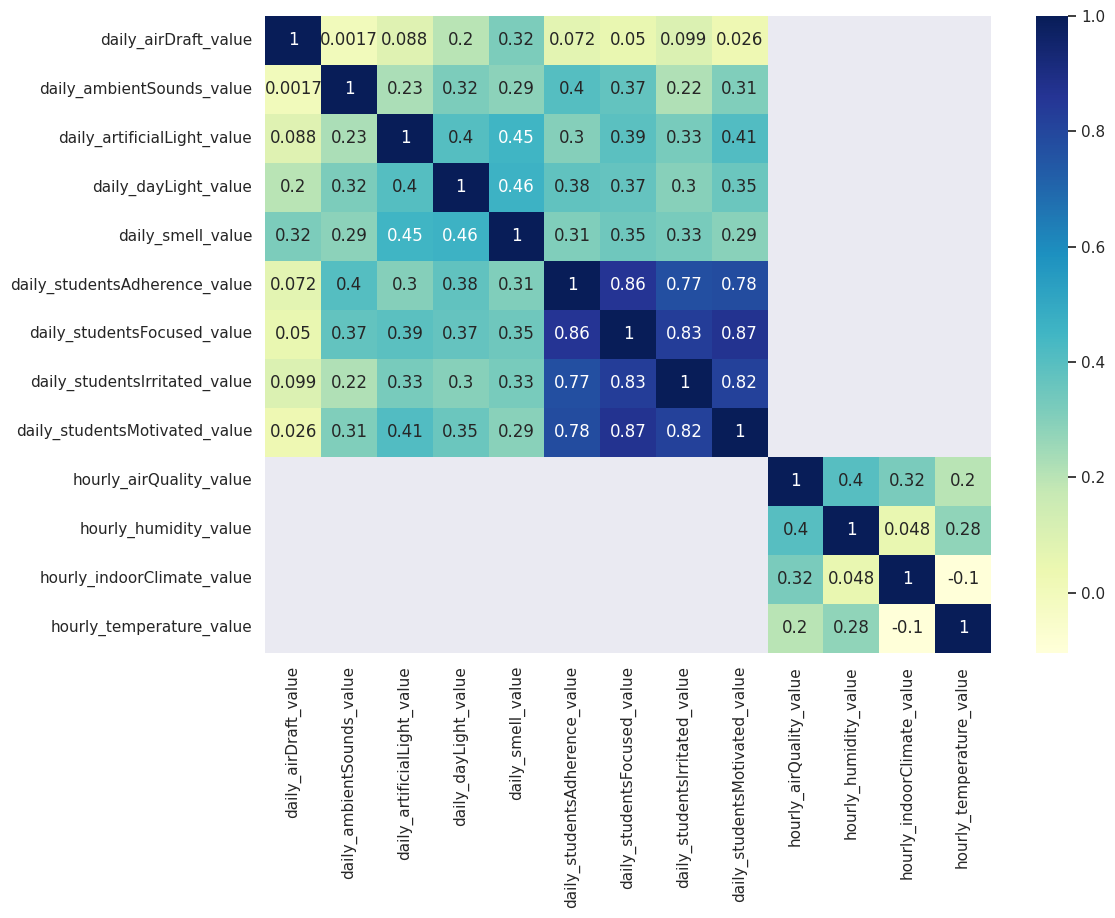

In [169]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
# plotting correlation heatmap
feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)
feedback_dataplot.get_figure().savefig("../plots/correleation_plot.png",bbox_inches='tight')


In [170]:
feedback_df.columns

Index(['_id', 'action', 'createdAt', 'daily_additionalComment_value',
       'daily_airDraft_timestamp', 'daily_airDraft_value',
       'daily_ambientSounds_timestamp', 'daily_ambientSounds_value',
       'daily_artificialLight_timestamp', 'daily_artificialLight_value',
       'daily_dayLight_timestamp', 'daily_dayLight_value',
       'daily_smell_timestamp', 'daily_smell_value',
       'daily_studentsAdherence_timestamp', 'daily_studentsAdherence_value',
       'daily_studentsFocused_timestamp', 'daily_studentsFocused_value',
       'daily_studentsIrritated_timestamp', 'daily_studentsIrritated_value',
       'daily_studentsMotivated_timestamp', 'daily_studentsMotivated_value',
       'device', 'finishedAt', 'heartbeat', 'hourly_airQuality_timestamp',
       'hourly_airQuality_value', 'hourly_humidity_timestamp',
       'hourly_humidity_value', 'hourly_indoorClimate_timestamp',
       'hourly_indoorClimate_value', 'hourly_temperature_timestamp',
       'hourly_temperature_value', 'part

In [171]:
def get_date_from_datetime(timestamp):
    return timestamp.date()

Removing readings from out of school hours

In [172]:
def only_school_hours(item,school_starttime = 6, school_endtime = 17):
    '''
    School hours are assumed to be starting from 6am and ending at 17pm by default
    '''
    if item.time() < datetime.time(school_starttime,0) :
        return np.nan
    elif item.time() > datetime.time(school_endtime,0) :
        return np.nan 
    else:
        return item

In [173]:
hourly_temperature_df['hourly_temperature_timestamp'] = hourly_temperature_df['hourly_temperature_timestamp'].apply(only_school_hours)

In [174]:
hourly_temperature_df = hourly_temperature_df.dropna()

In [175]:
hourly_temperature_df

,hourly_temperature_timestamp,hourly_temperature_value
1,2022-09-08 11:17:00,2.0
4,2022-09-08 12:08:00,3.0
5,2022-09-09 07:14:00,5.0
6,2022-09-14 06:58:00,5.0
7,2022-09-14 06:59:00,4.0
...,...,...
746,2022-10-24 12:05:00,3.0
747,2022-10-25 06:29:00,3.0
748,2022-10-25 11:09:00,5.0
749,2022-10-25 11:10:00,5.0


I cannot interpolate between the temperature readings easily because the values are discrete

What I though i could do:

Change index from datetime to date, then merge keeping the date

In [176]:
daily_studentsFocused_df['timestamp'] = daily_studentsFocused_df['daily_studentsFocused_timestamp']
hourly_temperature_df['timestamp'] = hourly_temperature_df['hourly_temperature_timestamp']

daily_studentsFocused_df['timestamp'].apply(get_date_from_datetime)
hourly_temperature_df['timestamp'].apply(get_date_from_datetime)


daily_studentsFocused_df = daily_studentsFocused_df.set_index(daily_studentsFocused_df['timestamp'])
hourly_temperature_df = hourly_temperature_df.set_index(hourly_temperature_df['timestamp'])

daily_studentsFocused_df = daily_studentsFocused_df.drop(columns=['daily_studentsFocused_timestamp','timestamp'])
hourly_temperature_df = hourly_temperature_df.drop(columns=['hourly_temperature_timestamp','timestamp'])

In [220]:
#merged_df = pd.concat([daily_studentsFocused_df,hourly_temperature_df],axis=1)
merged_df = daily_studentsFocused_df.join(hourly_temperature_df,how='outer')

In [221]:
merged_df = merged_df.sort_index()

In [234]:
merged_df[-50:]

,daily_studentsFocused_value,hourly_temperature_value
timestamp,,
2022-10-19 06:24:00,NaN,3.0
2022-10-19 07:05:00,NaN,3.0
2022-10-19 07:16:00,NaN,4.0
2022-10-19 09:11:00,3.0,NaN
2022-10-19 09:51:00,1.0,4.0
2022-10-19 10:33:00,4.0,NaN
2022-10-19 10:41:00,NaN,5.0
2022-10-19 10:48:00,NaN,4.0
2022-10-19 10:49:00,3.0,NaN


In [211]:
def Jitter(values, jitter):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values


Text(0.5, 0, 'hourly_temperature_value')

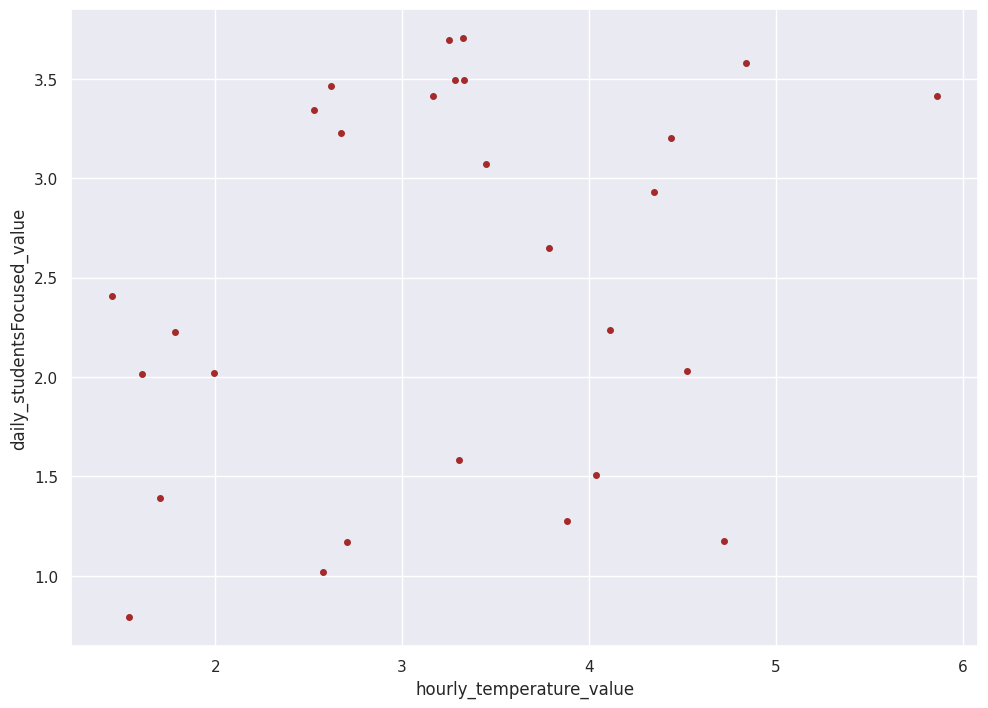

In [212]:
x1 = Jitter(merged_df['hourly_temperature_value'],0.9)
y1 = Jitter(merged_df['daily_studentsFocused_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('hourly_temperature_value')
plt.ylabel('daily_studentsFocused_value')
